In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from AQUA_general import AQUA
from batchAQUA_general import batchAQUA, pad_list
from plotting_functions import *


In [2]:
arr = np.array(["RS", "FS", "kjbdhscvjhsbFSkljnsdc", "JHBADCJHBSD"])

print(np.char.find(arr, "FS"))

[-1  0 12 -1]


In [3]:
# RS neuron parameter dict
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
     'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.01, 'f': 8.0, 'tau': 0.5}    # Class 1

x_start = np.array([-65, 0, 0])
t_start = 0.

In [4]:
neuron_RS = AQUA(RS)
neuron_RS.Initialise(x_start, t_start)

In [5]:
T = 2000
dt = 0.005
N_iter = int(T/dt)

I_inj = 100 * np.ones(N_iter)

X_RS, T_RS, RS_spikes = neuron_RS.update_RK2(dt, N_iter, I_inj)

print(RS_spikes)



100%|██████████| 399999/399999 [00:04<00:00, 84507.49it/s]

[  52.06        116.72        181.51        244.745       307.21
  369.22        430.975       492.575       554.08        615.54
  676.95        738.35        799.745       861.12        922.49
  983.87       1045.24       1106.61       1167.985      1229.36
 1290.735      1352.10000001 1413.47500001 1474.84000001 1536.21500001
 1597.59000001 1658.96500001 1720.33000001 1781.70000002 1843.07000002
 1904.43500002 1965.80000002]


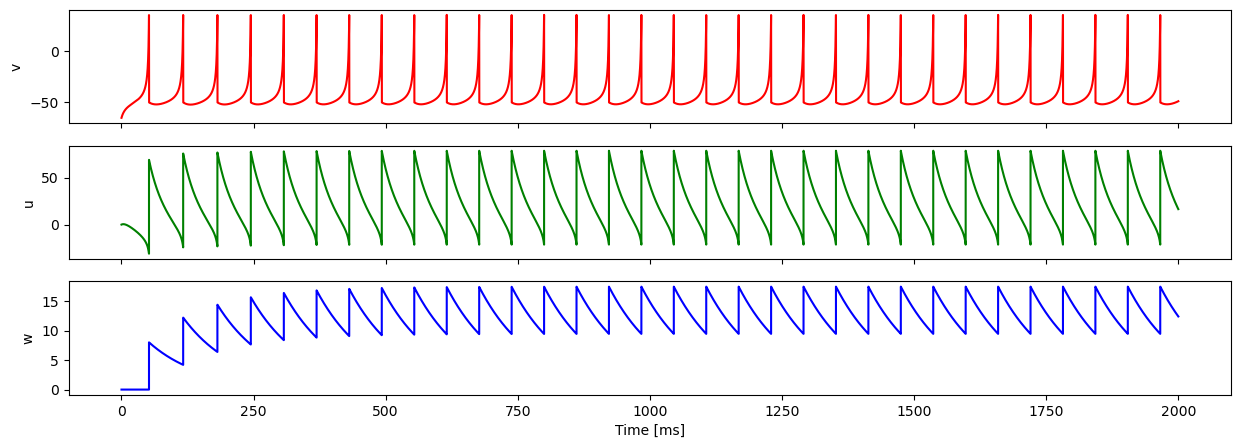

In [6]:
fig, ax = plot_membrane_variables(X_RS, T_RS)

100%|██████████| 399999/399999 [00:04<00:00, 82470.25it/s]


[  52.06        116.72        181.51        244.745       307.21
  369.22        430.975       492.575       554.08        615.54
  676.95        738.35        799.745       861.12        922.49
  983.87       1045.24       1106.61       1167.985      1229.36
 1290.735      1352.10000001 1413.47500001 1474.84000001 1536.21500001
 1597.59000001 1658.96500001 1720.33000001 1781.70000002 1843.07000002
 1904.43500002 1965.80000002]


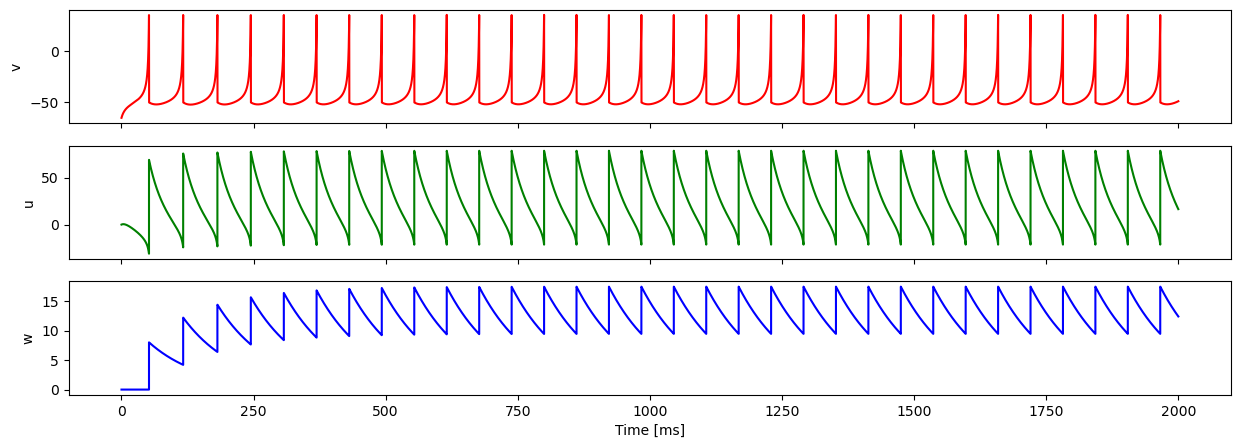

In [7]:
neuron_RS = AQUA(RS)
neuron_RS.Initialise(x_start, t_start)

I_inj = 100 * np.ones(N_iter)

X_RS, T_RS, RS_spikes = neuron_RS.update_RK2(dt, N_iter, I_inj)

fig, ax = plot_membrane_variables(X_RS, T_RS)

print(RS_spikes)

100%|██████████| 399999/399999 [00:04<00:00, 80989.26it/s]


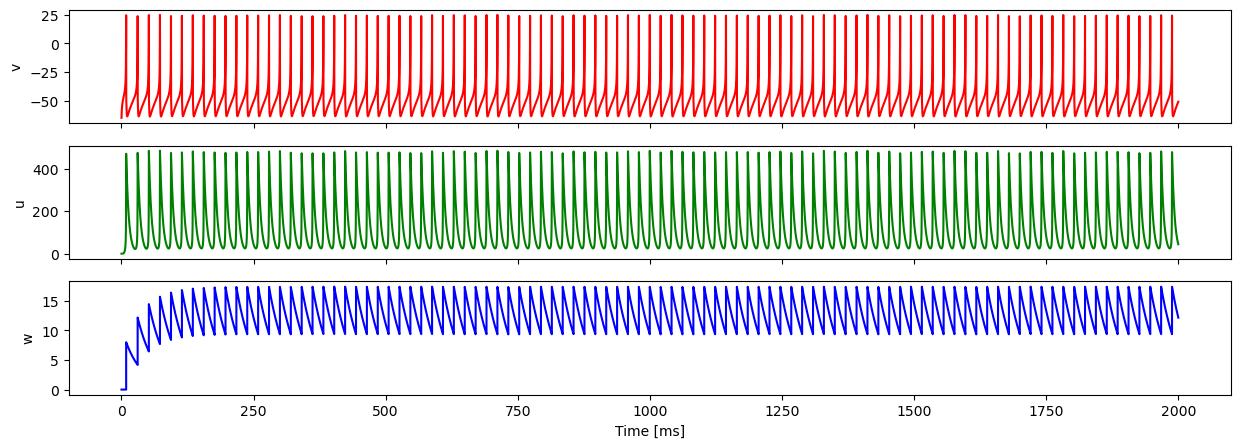

In [8]:
# FS neuron parameters
FS = {'name': 'FS', 'C': 20, 'k': 1, 'v_r': -55, 'v_t': -40, 'v_peak': 25,
     'a': 0.2, 'b': -2, 'c': -45, 'd': 0, 'e': 0.03, 'f': 8.0, 'tau': 0.5}    # Class 1


neuron_FS = AQUA(FS)
neuron_FS.Initialise(x_start, t_start)


I_inj = 100 * np.ones(N_iter)

X, T, FS_spikes = neuron_FS.update_RK2(dt, N_iter, I_inj)

fig, ax = plot_membrane_variables(X, T)

In [9]:
N_models = 10
param_list = []
x_ini = np.zeros((N_models, 3))
t_ini = np.zeros(N_models)


# create parameter list and initial conditions
for i in range(N_models):
    if i < 5:
        param_list.append(RS)
    else:
        param_list.append(FS)

    x_ini[i] = x_start
    t_ini[i] = t_start

# injected currents, identical for each neuron.
I_inj = 100 * np.ones((N_models, N_iter))


batch = batchAQUA(param_list)
batch.Initialise(x_ini, t_ini)

X, T, spikes = batch.update_batch(dt, N_iter, I_inj)



100%|██████████| 399999/399999 [01:07<00:00, 5910.41it/s]


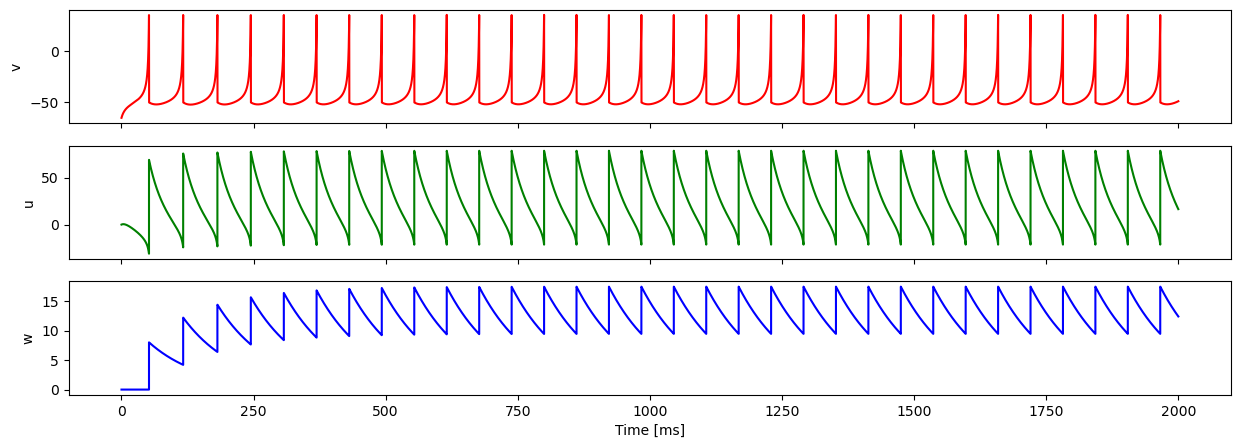

In [10]:
fig, ax = plot_membrane_variables(X[0, :], T)


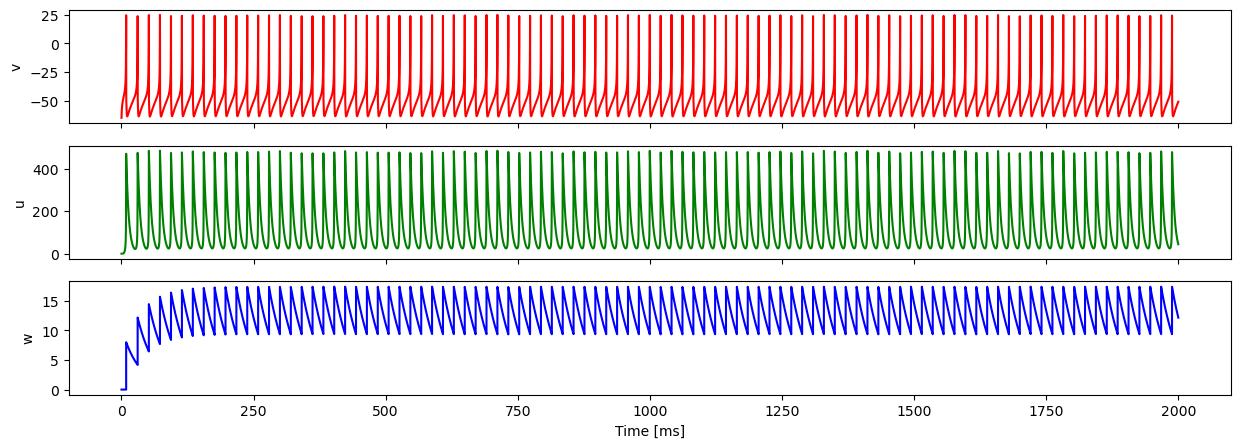

In [11]:
fig, ax = plot_membrane_variables(X[6], T)


In [12]:
print("Are the batch and normal models equivalent?")
print((spikes[0][~np.isnan(spikes[0])] == RS_spikes).all())
params = batch.get_params(0)
print(params)
print(spikes[0][~np.isnan(spikes[0])]) # batch spikes
print(RS_spikes)    # single neuron spikes


Are the batch and normal models equivalent?
True
{'name': np.str_('RS'), 'k': np.float64(0.7), 'C': np.int64(100), 'v_r': np.int64(-60), 'v_t': np.int64(-40), 'v_peak': np.int64(35), 'a': np.float64(0.03), 'b': np.int64(-2), 'c': np.int64(-50), 'd': np.int64(100), 'e': np.float64(0.01), 'f': np.float64(8.0), 'tau': np.float64(0.5)}
[  52.06        116.72        181.51        244.745       307.21
  369.22        430.975       492.575       554.08        615.54
  676.95        738.35        799.745       861.12        922.49
  983.87       1045.24       1106.61       1167.985      1229.36
 1290.735      1352.10000001 1413.47500001 1474.84000001 1536.21500001
 1597.59000001 1658.96500001 1720.33000001 1781.70000002 1843.07000002
 1904.43500002 1965.80000002]
[  52.06        116.72        181.51        244.745       307.21
  369.22        430.975       492.575       554.08        615.54
  676.95        738.35        799.745       861.12        922.49
  983.87       1045.24       1106.61   

In [13]:
params = batch.get_params(6)
print(params)
print(spikes[6][~np.isnan(spikes[6])])
print(FS_spikes)

{'name': np.str_('FS'), 'k': np.float64(1.0), 'C': np.int64(20), 'v_r': np.int64(-55), 'v_t': np.int64(-40), 'v_peak': np.int64(25), 'a': np.float64(0.2), 'b': np.int64(-2), 'c': np.int64(-45), 'd': np.int64(0), 'e': np.float64(0.03), 'f': np.float64(8.0), 'tau': np.float64(0.5)}
[   8.835        30.57         51.79         72.815        93.685
  114.355       135.          155.665       176.28        196.865
  217.425       238.          258.6         279.2         299.82
  320.465       341.03        361.56        382.085       402.61
  423.185       443.825       464.4         484.99        505.555
  526.12        546.695       567.235       587.775       608.405
  628.965       649.605       670.22        690.77        711.42
  732.085       752.685       773.235       793.81        814.42
  835.015       855.545       876.17        896.755       917.36
  937.93        958.51        979.145       999.74       1020.395
 1040.97       1061.625      1082.235      1102.82       1123.42

  0%|          | 0/199999 [00:00<?, ?it/s]

100%|██████████| 199999/199999 [00:02<00:00, 76299.23it/s]


SPIKES
[  52.06  116.66  181.43  244.65  307.07  369.05  430.79  492.35  553.84
  615.27  676.68  738.04  799.42  860.77  922.11  983.46 1044.81 1106.15
 1167.49 1228.83 1290.19 1351.53 1412.87 1474.21 1535.55 1596.9  1658.25
 1719.61 1780.96 1842.29 1903.64 1964.98]
[-51.59526405  58.71868158  15.95372729]


100%|██████████| 199999/199999 [00:02<00:00, 81661.88it/s]


SETUP EQUIVALENT??
True
[ 553.84        615.27        676.68        738.04        799.42
  860.77        922.11        983.46       1044.81       1106.15
 1167.49       1228.83       1290.19       1351.53       1412.87
 1474.21       1535.55       1596.9        1658.25       1719.61
 1780.96       1842.29       1903.64       1964.98       2026.33
 2087.67       2149.03       2210.37       2271.72       2333.08
 2394.42000001 2455.78000001]


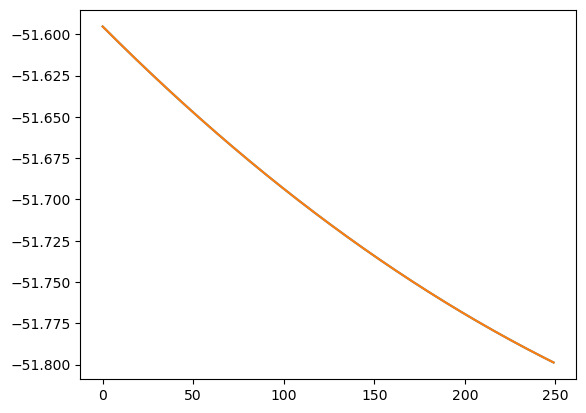

In [8]:
## Test how the model works if you initialise from a point in a previous run.

# RS neuron parameter dict
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
     'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.01, 'f': 8.0, 'tau': 0.}    # Class 1

x_start = np.array([-65, 0, 0])
t_start = np.array([0.])

T = 2000
dt = 0.01
N_iter = int(T/dt)

neuron_RS = AQUA(RS)
neuron_RS.Initialise(x_start, t_start)


I_inj = 100 * np.ones(N_iter)

X_RS, T_RS, RS_spikes = neuron_RS.update_RK2(dt, N_iter, I_inj)

print("SPIKES")
print(RS_spikes)

idx = 50000
t_ini = T_RS[idx]
x_ini = X_RS[:, idx]
print(x_ini)
w_prev = X_RS[2, idx - int(RS["tau"]/dt): idx]

neuron_RS.Initialise(x_ini, t_ini)
X, T, spikes = neuron_RS.update_RK2(dt, N_iter, I_inj, w_prev)

plt.plot(X_RS[0, idx:idx+250])
plt.plot(X[0, :250])

print("SETUP EQUIVALENT??") # Here, a single neuron matches a previous run.
print((X_RS[0, idx:idx+250] == X[0, :250]).all())

print(spikes)

100%|██████████| 199999/199999 [00:02<00:00, 77832.83it/s]


52.05999999999821
[50 50]


100%|██████████| 199999/199999 [00:33<00:00, 6006.70it/s]


MODELS ARE EQUIVALENT?
True
[[ 554.03        615.47        676.87        738.27        799.65
   861.02        922.39        983.76       1045.12       1106.49
  1167.86       1229.22       1290.57       1351.93       1413.3
  1474.66       1536.04       1597.39       1658.76       1720.11
  1781.48       1842.85       1904.2        1965.58       2026.93
  2088.29       2149.65       2211.03       2272.39       2333.75
  2395.12000001 2456.49000001]
 [ 554.03        615.47        676.87        738.27        799.65
   861.02        922.39        983.76       1045.12       1106.49
  1167.86       1229.22       1290.57       1351.93       1413.3
  1474.66       1536.04       1597.39       1658.76       1720.11
  1781.48       1842.85       1904.2        1965.58       2026.93
  2088.29       2149.65       2211.03       2272.39       2333.75
  2395.12000001 2456.49000001]]


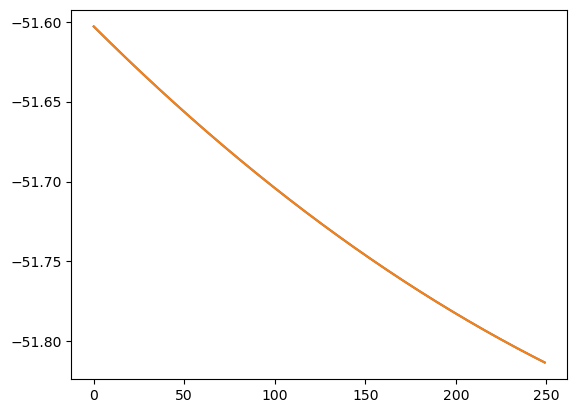

In [9]:
## Compare batch to the single neuron

RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
     'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.01, 'f': 8.0, 'tau': 0.5}    # Class 1


x_start = np.array([[-65, 0, 0],
                    [-65, 0, 0]])
t_start = np.array([0., 0.])

T = 2000
dt = 0.01
N_iter = int(T/dt)

params = [RS, RS]


neuron = AQUA(RS)
neuron.Initialise(x_start[0], t_start[0])


I_inj = 100 * np.ones((2, N_iter))


#initial run
X_RS, T_RS, RS_spikes = neuron.update_RK2(dt, N_iter, I_inj[0, :])

print(RS_spikes[0])


batch = batchAQUA(params)

idx = 50000
#initialise with points from the initial sim.
t_ini = np.array([T_RS[idx], T_RS[idx]])

# initialise with single neuron run
x_ini = np.array([X_RS[:, idx], X_RS[:, idx]])


w_prev = [X_RS[2, idx - int(tau/dt): idx].tolist() for tau in batch.tau]
w_prev = pad_list(w_prev, pad_end = False)




batch.Initialise(x_ini, t_ini)
X, T, spikes = batch.update_batch(dt, N_iter, I_inj, w_prev)

plt.plot(X_RS[0, idx:idx+250])
plt.plot(X[0, 0, :250])
print("MODELS ARE EQUIVALENT?")
print((X_RS[0, idx:idx+250] == X[0, 0, :250]).all())

print(spikes)

In [3]:
print((X_RS[0, idx:idx+250] == X[0, 0, :250]).all())
print(np.argwhere(X_RS[0, idx:idx+250] == X[0, 0, :250]).flatten())
print(X_RS[0, idx:idx+250] - X[0, 0, :250])

True
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 2

[100 140]


100%|██████████| 399999/399999 [01:05<00:00, 6122.19it/s]


[  52.06        116.72        181.51        244.745       307.21
  369.22        430.975       492.575       554.08        615.54
  676.95        738.35        799.745       861.12        922.49
  983.87       1045.24       1106.61       1167.985      1229.36
 1290.735      1352.10000001 1413.47500001 1474.84000001 1536.21500001
 1597.59000001 1658.96500001 1720.33000001 1781.70000002 1843.07000002
 1904.43500002 1965.80000002]
T INI
[250. 250.]
X INITIAL
[[-51.32983677  63.56205446  14.83869908]
 [-51.33584209  63.64694494  14.84347353]]
TAU
[0.5 0.7]
W PREV
[[        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan   

100%|██████████| 399999/399999 [01:05<00:00, 6132.13it/s]


True
[[ 307.21        369.22        430.975       492.575       554.08
   615.54        676.95        738.35        799.745       861.12
   922.49        983.87       1045.24       1106.61       1167.985
  1229.36       1290.73500001 1352.10000001 1413.47500001 1474.84000001
  1536.21500001 1597.59000001 1658.96500001 1720.33000001 1781.70000002
  1843.07000002 1904.43500002 1965.80000002 2027.17500002 2088.54500002
  2149.91000002 2211.28000003]
 [ 307.245       369.27        431.02        492.63        554.135
   615.595       677.015       738.42        799.815       861.205
   922.59        983.965      1045.345      1106.73       1168.11
  1229.485      1290.86000001 1352.24000001 1413.62000001 1475.00000001
  1536.38000001 1597.75500001 1659.13000001 1720.51000001 1781.88500002
  1843.26000002 1904.63000002 1966.01000002 2027.39500002 2088.77000002
  2150.15000002 2211.52000003]]


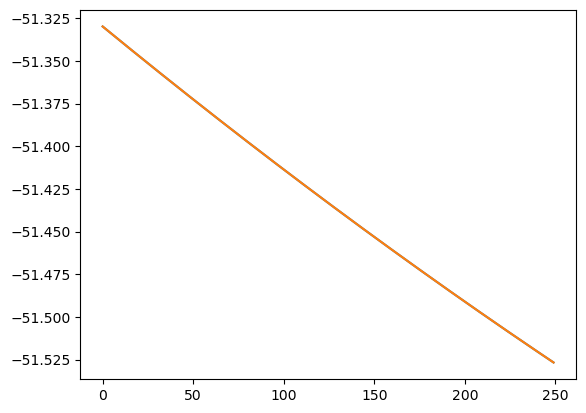

In [4]:
## Test how the batch model works if you initialise from a point in a previous run.

# RS neuron parameter dict
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
     'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.01, 'f': 8.0, 'tau': 0.5}    # Class 1

RS2 = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
     'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.01, 'f': 8.0, 'tau': 0.7}    # Class 1

x_start = np.array([[-65, 0, 0],
                    [-65, 0, 0]])
t_start = np.array([0., 0.])

T = 2000
dt = 0.005
N_iter = int(T/dt)



params = [RS, RS2]
batch = batchAQUA(params)
batch.Initialise(x_start, t_start)


I_inj = 100 * np.ones((2, N_iter))


#initial run
X_RS, T_RS, RS_spikes = batch.update_batch(dt, N_iter, I_inj)

print(RS_spikes[0])

idx = 50000
#initialise with points from the initial sim.
t_ini = np.array([T_RS[idx], T_RS[idx]])
print("T INI")
print(t_ini)

# initialise with RS and RS2 
x_ini = np.array([X_RS[0, :, idx], X_RS[1, :, idx]])
print("X INITIAL")
print(x_ini)

print("TAU")
print(batch.tau)

w_prev = [X_RS[n, 2, idx - int(tau/dt): idx].tolist() for n, tau in enumerate(batch.tau)]
w_prev = pad_list(w_prev, pad_end = False)

print("W PREV")
print(w_prev)



batch.Initialise(x_ini, t_ini)
X, T, spikes = batch.update_batch(dt, N_iter, I_inj, w_prev)

plt.plot(X_RS[0, 0, idx:idx+250])
plt.plot(X[0, 0, :250])
print((X_RS[0, 0, idx:idx+250] == X[0, 0, :250]).all())

print(spikes)

In [5]:
# STILL DIVERGES

print(np.shape(RS_spikes))
print("0:")
print(RS_spikes[0][RS_spikes[0] >= spikes[0, 0]-1])
print(spikes[0])

print("THE MODELS ARE EQUIVALENT?")
print((X_RS[0, 0, idx:idx+250] == X[0, 0, :250]).all())


(2, 32)
0:
[ 307.21        369.22        430.975       492.575       554.08
  615.54        676.95        738.35        799.745       861.12
  922.49        983.87       1045.24       1106.61       1167.985
 1229.36       1290.735      1352.10000001 1413.47500001 1474.84000001
 1536.21500001 1597.59000001 1658.96500001 1720.33000001 1781.70000002
 1843.07000002 1904.43500002 1965.80000002]
[ 307.21        369.22        430.975       492.575       554.08
  615.54        676.95        738.35        799.745       861.12
  922.49        983.87       1045.24       1106.61       1167.985
 1229.36       1290.73500001 1352.10000001 1413.47500001 1474.84000001
 1536.21500001 1597.59000001 1658.96500001 1720.33000001 1781.70000002
 1843.07000002 1904.43500002 1965.80000002 2027.17500002 2088.54500002
 2149.91000002 2211.28000003]
THE MODELS ARE EQUIVALENT?
True


In [6]:
print(np.shape(RS_spikes))
print("1:")
print(RS_spikes[1][RS_spikes[1] >= spikes[1, 0]-1])
print(spikes[1])

print("THE MODELS ARE EQUIVALENT?")
print((X_RS[1, 0, idx:idx+250] == X[1, 0, :250]).all())

(2, 32)
1:
[ 307.245       369.27        431.02        492.63        554.135
  615.595       677.015       738.42        799.815       861.205
  922.59        983.965      1045.345      1106.73       1168.11
 1229.485      1290.86       1352.24000001 1413.62000001 1475.00000001
 1536.38000001 1597.75500001 1659.13000001 1720.51000001 1781.88500002
 1843.26000002 1904.63000002 1966.01000002]
[ 307.245       369.27        431.02        492.63        554.135
  615.595       677.015       738.42        799.815       861.205
  922.59        983.965      1045.345      1106.73       1168.11
 1229.485      1290.86000001 1352.24000001 1413.62000001 1475.00000001
 1536.38000001 1597.75500001 1659.13000001 1720.51000001 1781.88500002
 1843.26000002 1904.63000002 1966.01000002 2027.39500002 2088.77000002
 2150.15000002 2211.52000003]
THE MODELS ARE EQUIVALENT?
True


In [16]:
w_prev = [X_RS[n, 2, idx - int(tau/dt): idx].tolist() for n, tau in enumerate(batch.tau)]

print(len(w_prev))
print(len(w_prev[0]))
print(len(w_prev[1]))

w_prev = pad_list(w_prev, pad_end = False)
#print(w_prev)


print((batch.tau/dt).astype(int))

2
100
140
[100 140]


In [12]:
print(X[0, :, 250])

[-51.81377932  53.66910432  15.58579207]


In [14]:
arr = np.array([X[0, :, 250], X[0, :, 251], X[0, :, 252], X[0, :, 253]])

print(arr)

[[-51.81377932  53.66910432  15.58579207]
 [-51.81434851  53.64809518  15.58423356]
 [-51.81491561  53.62709268  15.58267522]
 [-51.81548062  53.60609682  15.58111703]]
